# Project Header

*Student's name*

---

## Project description

text

In [174]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from copy import deepcopy
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, cross_validate, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import normalize

warnings.filterwarnings('ignore')

# Loading the data

In [2]:
DATA = pd.read_csv('./data.csv').iloc[:,:-1]
VALIDATION = DATA.iloc[:int(DATA.shape[0]*0.2),:].reset_index(drop=True), DATA.diagnosis[:int(DATA.shape[0]*0.2)].reset_index(drop=True)
X_true = DATA.iloc[int(DATA.shape[0]*0.2):,2:].reset_index(drop=True)
Y = DATA.diagnosis[int(DATA.shape[0]*0.2):].reset_index(drop=True)

X_true

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.510,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,11.160,22.75,72.62,374.4,0.13000,0.20490,0.1295,0.06136,0.2383,0.09026
1,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.17240,0.23640,0.2456,0.10500,0.2926,0.10170
2,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,13.670,26.15,87.54,583.0,0.15000,0.23990,0.1503,0.07247,0.2438,0.08541
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.11790,0.18790,0.1544,0.03846,0.1652,0.07722
4,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,...,18.810,27.37,127.10,1095.0,0.18780,0.44800,0.4704,0.20270,0.3585,0.10650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
452,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
453,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
454,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


In [3]:
X_true.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,14.050717,19.206601,91.301952,648.613816,0.094939,0.099148,0.082495,0.045708,0.178488,0.062249,...,16.047434,25.450833,105.580329,858.306579,0.129903,0.237279,0.252217,0.107990,0.282948,0.081982
std,3.544076,4.445959,24.378768,358.076605,0.013768,0.049043,0.077198,0.037959,0.025895,0.006681,...,4.800177,6.268120,33.143408,571.608459,0.022005,0.139594,0.195126,0.063075,0.054889,0.015962
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.617500,16.027500,74.472500,411.950000,0.084885,0.062185,0.026873,0.019353,0.160100,0.057607,...,12.817500,20.777500,83.442500,501.425000,0.114200,0.139475,0.106150,0.062550,0.247250,0.070617
50%,13.185000,18.605000,85.020000,538.150000,0.094260,0.086195,0.054630,0.030815,0.176950,0.061290,...,14.585000,25.090000,95.385000,655.300000,0.129700,0.205100,0.197600,0.092875,0.277950,0.078535
75%,15.622500,21.685000,102.975000,758.600000,0.103725,0.126850,0.115350,0.064710,0.194300,0.065530,...,18.085000,29.037500,121.250000,997.450000,0.142525,0.310175,0.362025,0.151100,0.310900,0.089862
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.267800,0.095750,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.170000,0.290300,0.577400,0.148600


In [4]:
Y.describe()

count     456
unique      2
top         B
freq      312
Name: diagnosis, dtype: object

In [20]:
X = deepcopy(X_true)
np.random.seed(0)

for i in X.columns:
    X.loc[np.random.choice(X.shape[0], int(X.shape[0]*0.3)),i] = None #np.zeros(int(X.shape[0]*0.1))
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.510,NaN,68.64,334.2,NaN,0.13030,NaN,NaN,0.1922,0.07782,...,11.160,NaN,72.62,374.4,NaN,NaN,0.1295,NaN,NaN,0.09026
1,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,NaN,19.62,NaN,NaN,NaN,0.23640,0.2456,0.10500,NaN,0.10170
2,11.930,21.53,NaN,438.6,0.09768,0.07849,0.03328,0.02008,NaN,0.06194,...,13.670,26.15,87.54,583.0,0.15000,0.23990,NaN,NaN,0.2438,NaN
3,8.950,NaN,58.74,245.2,NaN,NaN,NaN,0.02308,0.1305,NaN,...,9.414,17.07,NaN,NaN,NaN,0.18790,0.1544,0.03846,NaN,NaN
4,14.870,16.67,98.64,NaN,NaN,0.16490,0.16900,0.08923,0.2157,0.06768,...,18.810,NaN,127.10,1095.0,NaN,0.44800,NaN,NaN,0.3585,0.10650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,21.560,NaN,142.00,1479.0,0.11100,NaN,0.24390,0.13890,NaN,NaN,...,NaN,NaN,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,NaN,NaN
452,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,NaN,NaN,0.11660,0.19220,NaN,0.16280,0.2572,0.06637
453,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,NaN,0.05648,...,NaN,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,NaN
454,20.600,29.33,140.10,1265.0,NaN,0.27700,NaN,0.15200,NaN,0.07016,...,NaN,NaN,NaN,1821.0,0.16500,NaN,0.9387,NaN,0.4087,NaN


In [21]:
#difference between true matrix and corrupted one
X_true.describe()-X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,115.000000,117.000000,118.000000,117.000000,116.000000,120.000000,124.000000,119.000000,121.000000,114.000000,...,120.000000,116.000000,119.00000,118.000000,122.000000,116.000000,121.000000,120.000000,122.000000,118.000000
mean,-0.037591,0.057604,-0.280474,3.919126,-0.000264,-0.001022,0.002682,-0.000472,-0.000743,0.000045,...,-0.022735,-0.148255,-0.51614,-8.394013,-0.000885,-0.001285,0.001004,0.001820,-0.000237,0.000340
std,-0.070165,-0.141717,-0.092753,6.261283,-0.000189,-0.001343,0.001963,0.000010,0.000056,0.000541,...,0.062397,-0.093252,-0.44075,26.031754,0.000253,0.000680,0.002130,0.000145,0.000931,0.000214
min,-0.069000,0.000000,-0.060000,-8.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.16000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008200,0.000000
25%,0.107500,0.117500,-0.285000,-8.100000,-0.000288,0.000928,0.000000,-0.000277,-0.001850,-0.000620,...,0.050000,-0.297500,-0.29750,-19.275000,-0.002400,-0.000625,0.001500,0.001650,-0.000600,0.000315
50%,-0.015000,0.015000,-0.375000,0.850000,-0.000280,0.000505,0.001220,-0.000065,-0.000950,0.000005,...,0.090000,-0.280000,0.15500,-16.200000,-0.001500,-0.004800,0.002000,0.001105,0.000000,0.000315
75%,-0.127500,0.135000,0.100000,11.700000,-0.000250,-0.001475,0.003925,0.000080,-0.000850,-0.000143,...,-0.162500,0.077500,-3.65000,-44.300000,-0.000250,0.000525,-0.004075,0.004575,0.000600,0.000287
max,0.690000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.009900,0.000000,0.002790,...,2.910000,0.000000,0.00000,822.000000,0.000000,0.000000,0.231300,0.014700,0.000000,0.004000


# Data Visualization / Analysis

Unique y-values [1 0]


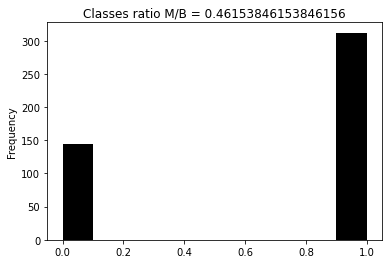

In [23]:
print('Unique y-values', Y.unique())

#Encode M and B classes by 0 and 1 values
try: 
    Y.replace(['M','B'], [0,1], inplace=True) 
except: 
    pass

Y.plot(kind='hist', color='black', title='Classes ratio M/B = {}'.format(Y[Y==0].count()/Y[Y==1].count()));

That is, objective feature Y is not well-balanced (ratio should be close to 1). We need to balance it by augmenting the dataset or cutting objects corresponding to B class. Also we can just use different weights for each of the classes.

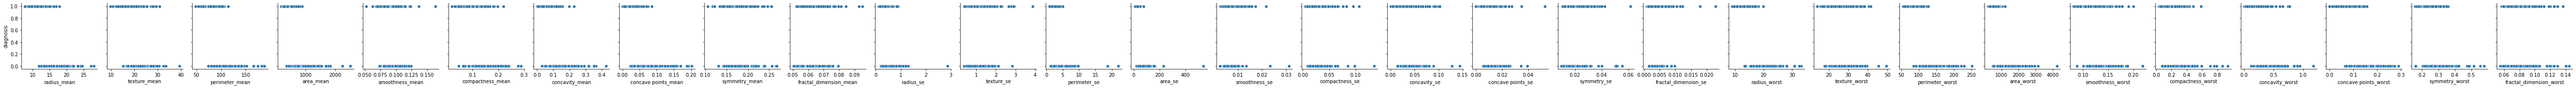

In [10]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2, shuffle=True)

TRAIN = pd.concat([X_TRAIN,Y_TRAIN], axis=1)
#now we work only with train sets, we are not able to sneak what happends in test sets
sns.pairplot(TRAIN, y_vars='diagnosis', x_vars=X_TRAIN.columns.values);

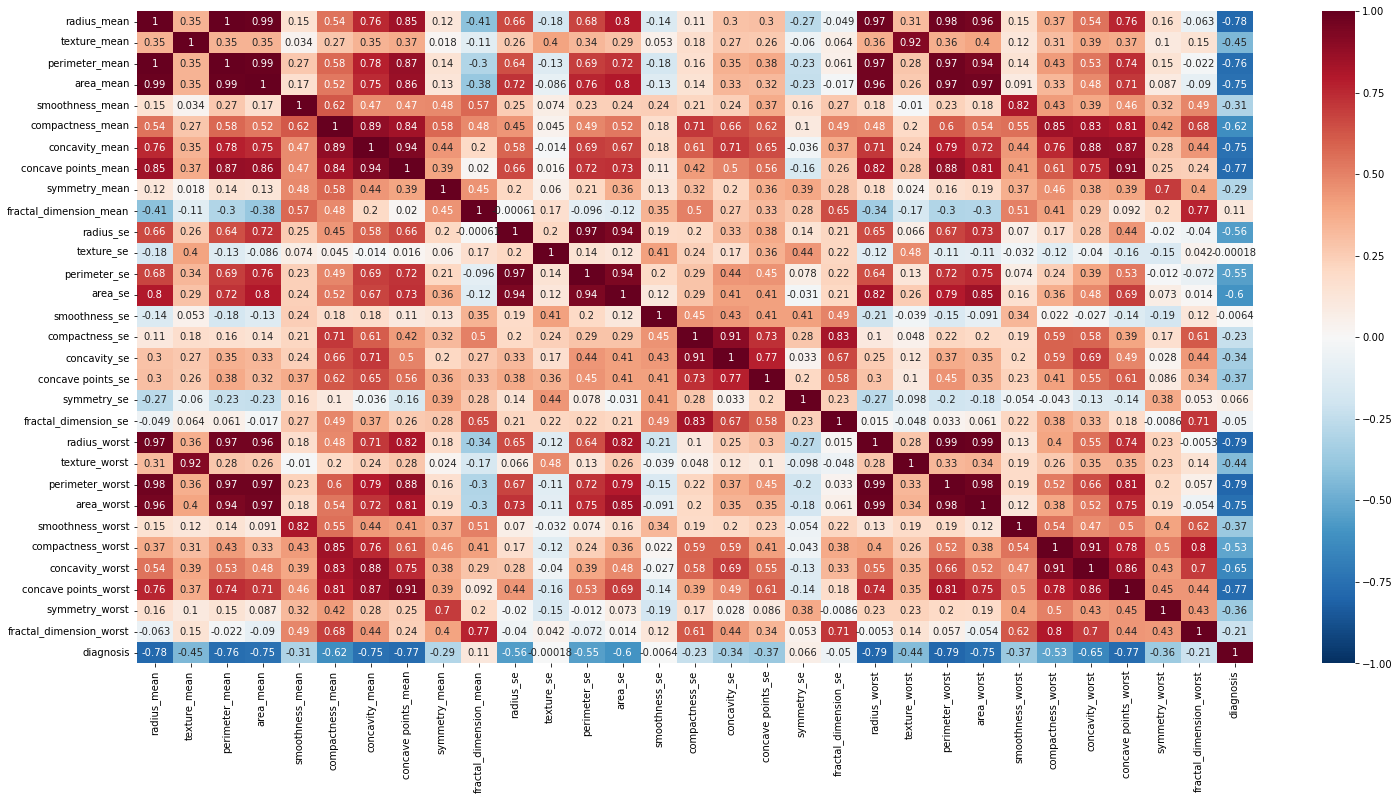

In [11]:
#Correlation heatmap for corrupted matrix
plt.figure(figsize=(25,12))
sns.heatmap(TRAIN.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

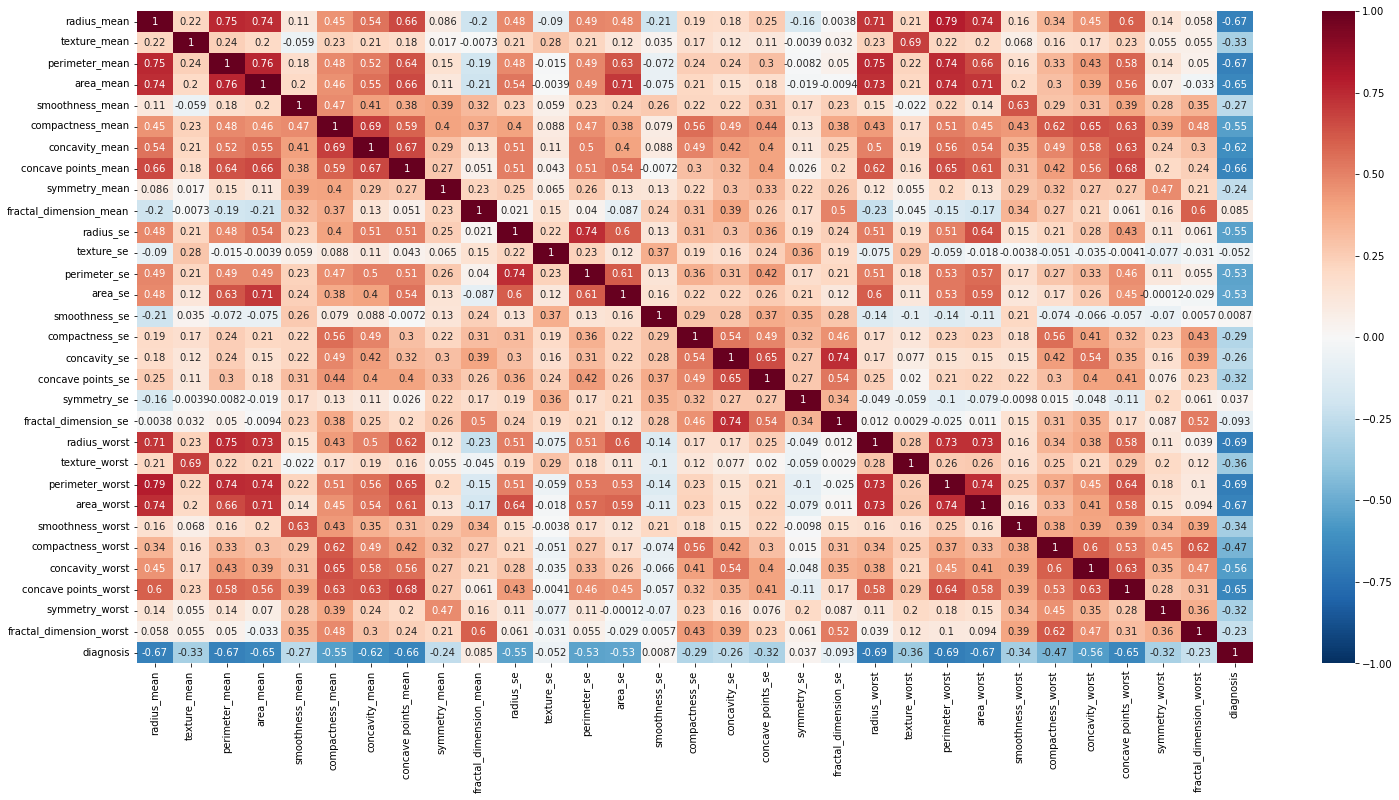

In [24]:
#The same, but for matrix with filled gaps by column mean
X_filled_mean = X.fillna(X.mean(axis=0), axis=0)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_filled_mean, Y, test_size=0.2, shuffle=True)
TRAIN = pd.concat([X_TRAIN,Y_TRAIN], axis=1)

plt.figure(figsize=(25,12))
sns.heatmap(TRAIN.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

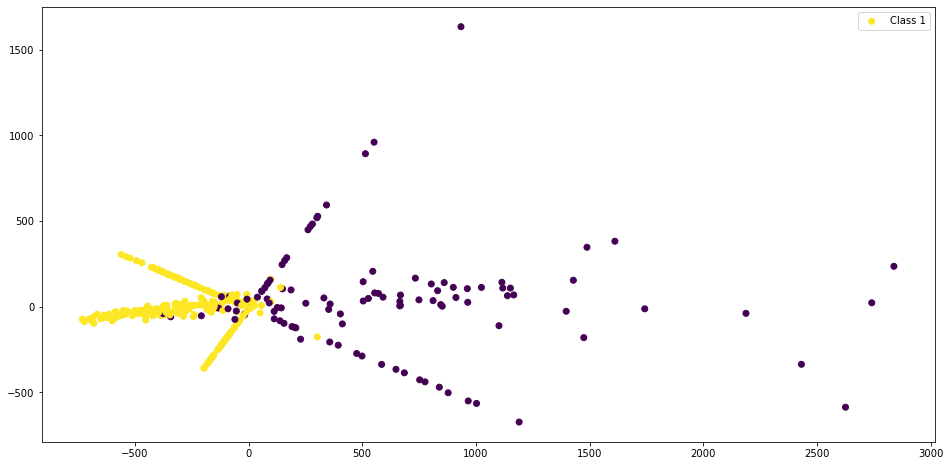

In [25]:
#PCA works only with filled gaps matricies
pca_2 = PCA(n_components=2)
X_TRAIN_PCA_2 = pca_2.fit_transform(X_TRAIN, Y_TRAIN)

plt.figure(figsize=(16,8))
plt.scatter(X_TRAIN_PCA_2[:,0], X_TRAIN_PCA_2[:,1], marker='o', c=(Y_TRAIN==1), label='Class 1')
plt.legend();

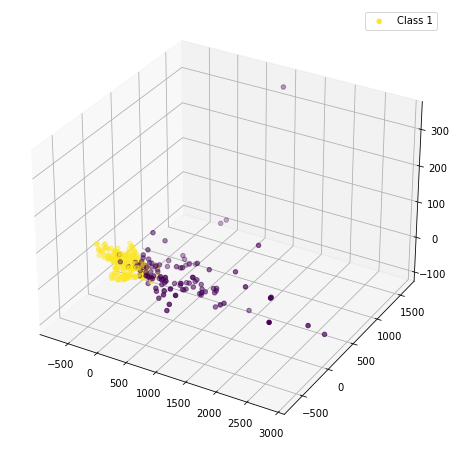

In [26]:
pca_3 = PCA(n_components=3)
X_TRAIN_PCA_3 = pca_3.fit_transform(X_TRAIN, Y_TRAIN)

plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.scatter(X_TRAIN_PCA_3[:,0], X_TRAIN_PCA_3[:,1], X_TRAIN_PCA_3[:,2], marker='o', c=(Y_TRAIN==1), label='Class 1')
plt.legend();

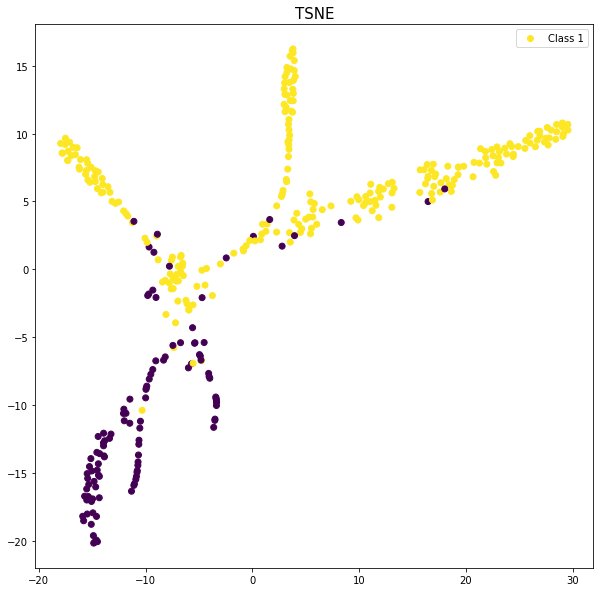

In [27]:
tsne2 = TSNE(random_state=0)
PIC2 = tsne2.fit_transform(TRAIN)

fig = plt.figure(figsize=(10,10))
plt.scatter(PIC2[:, 0], PIC2[:, 1], c=(TRAIN.diagnosis==1), label='Class 1')
plt.title('TSNE', size=15)
plt.legend();

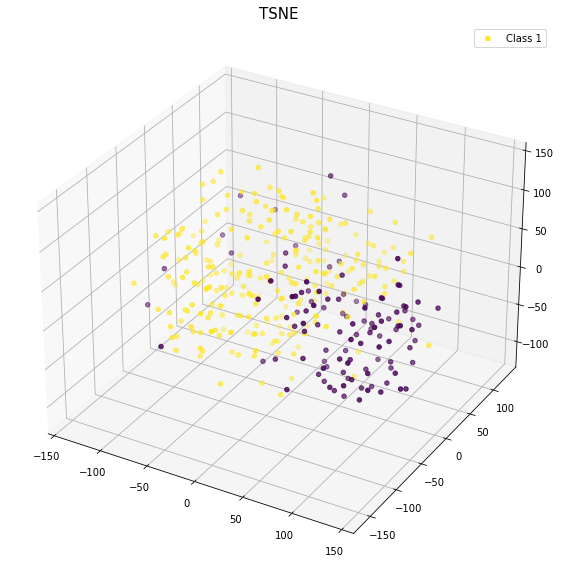

In [28]:
tsne3 = TSNE(n_components=3, random_state=0)
PIC3 = tsne3.fit_transform(TRAIN)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(PIC3[:, 0], PIC3[:, 1], PIC3[:, 2], c=(TRAIN.diagnosis==1), label='Class 1')
plt.title('TSNE', size=15)
plt.legend();

# Baseline accuracy

In [29]:
#Preparing function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [209]:
#Fitting, predicting and scoring classificator's pool (check does the class labels correctly plotted by confusion matrix)
def fit_predict(MODELS, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST):
    RESULT = []

    for k,classificator in enumerate(MODELS):
        classificator.fit(X_TRAIN, Y_TRAIN)
        RESULT.append({'Classificator' : classificator.__class__.__name__,
                      'Accuracy' : accuracy_score(Y_TEST, classificator.predict(X_TEST)),
                      'F1' : f1_score(Y_TEST, classificator.predict(X_TEST)),
                      'Precision' : precision_score(Y_TEST, classificator.predict(X_TEST)),
                      'Recall' : recall_score(Y_TEST, classificator.predict(X_TEST)),
                      'Confusion Matrix' : confusion_matrix(Y_TEST, classificator.predict(X_TEST)),
                      'ROC AUC' : roc_auc_score(Y_TEST, classificator.predict(X_TEST))})

        print(RESULT[k]['Classificator']+' Confusion Matrix')
        plot_confusion_matrix(RESULT[k]['Confusion Matrix'], classes=['Class 0', 'Class 1'], normalize=True, title='Normalized')
        plt.show()

    RESULT = pd.DataFrame(RESULT).set_index('Classificator')
    return RESULT

LogisticRegression Confusion Matrix


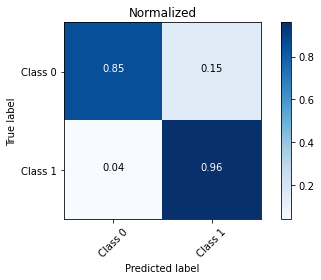

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.921053,0.940397,0.922078,0.959459,"[[34, 6], [3, 71]]",0.90473


In [27]:
###### ATTENTION!
###### I saved it from the previous notebook version to see the difference how gaps affect accuracy

# MODELS = [LogisticRegression()]

# fit_predict(MODELS, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

LogisticRegression Confusion Matrix


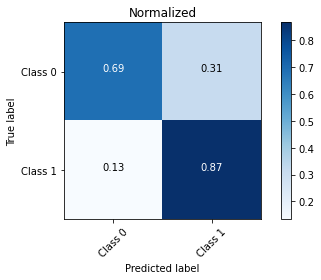

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.804348,0.852459,0.83871,0.866667,"[[22, 10], [8, 52]]",0.777083


In [31]:
BASELINE_MODEL = LogisticRegression()

fit_predict([BASELINE_MODEL], X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

# Data Preprocessing

LogisticRegression Confusion Matrix


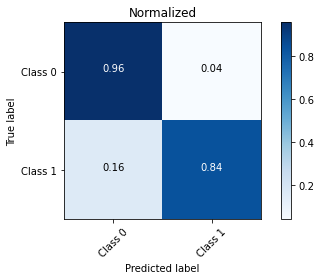

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.869565,0.904762,0.982759,0.838235,"[[23, 1], [11, 57]]",0.898284


In [145]:
# Let's fill-in gaps by using SVD (we somewhat gonna predict gaps)
U,S,VT = np.linalg.svd(X_filled_mean)
X_RECONSTRUCTED = pd.DataFrame(U @ np.vstack((np.diag(S), np.zeros((U.shape[0]-30, S.shape[0])))) @ VT, columns=X_filled_mean.columns)
X_TRAIN_svd, X_TEST_svd, Y_TRAIN_svd, Y_TEST_svd = train_test_split(X_RECONSTRUCTED, Y, test_size=0.2, shuffle=True)

#filled gaps by svd + class weights
TEMP_MODEL = LogisticRegression(class_weight='balanced')

fit_predict([TEMP_MODEL], X_TRAIN_svd, X_TEST_svd, Y_TRAIN_svd, Y_TEST_svd)

# Feature Engineering

In [150]:
# Let's perform Feature Selection (dimensionality reduction)
X_RECONSTRUCTED.var()

radius_mean                     9.761166
texture_mean                   15.634740
perimeter_mean                443.547797
area_mean                   91946.415847
smoothness_mean                 0.000145
compactness_mean                0.001869
concavity_mean                  0.004118
concave points_mean             0.001063
symmetry_mean                   0.000490
fractal_dimension_mean          0.000028
radius_se                       0.052398
texture_se                      0.225503
perimeter_se                    2.710680
area_se                      2039.917554
smoothness_se                   0.000008
compactness_se                  0.000224
concavity_se                    0.000713
concave points_se               0.000031
symmetry_se                     0.000038
fractal_dimension_se            0.000004
radius_worst                   16.526587
texture_worst                  30.150172
perimeter_worst               832.907583
area_worst                 220460.171956
smoothness_worst

In [151]:
#Important features by variance thresholding
X_RECONSTRUCTED.columns[X_RECONSTRUCTED.var()>1]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')

LogisticRegression Confusion Matrix


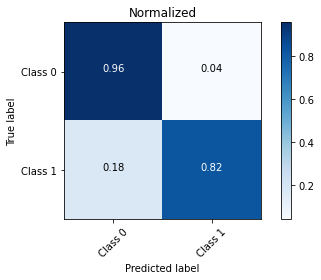

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.858696,0.896,0.982456,0.823529,"[[23, 1], [12, 56]]",0.890931


In [152]:
TEMP_MODEL = LogisticRegression(class_weight='balanced')

fit_predict([TEMP_MODEL], 
            X_TRAIN_svd[X_RECONSTRUCTED.columns[X_RECONSTRUCTED.var()>1]], 
            X_TEST_svd[X_RECONSTRUCTED.columns[X_RECONSTRUCTED.var()>1]], 
            Y_TRAIN_svd, Y_TEST_svd)

In [146]:
#Important features by l1 regularization
selector1 = LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced').fit(X_TRAIN_svd, Y_TRAIN_svd)
X_TRAIN_svd.columns[(selector1.coef_!=0)[0]]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst'],
      dtype='object')

LogisticRegression Confusion Matrix


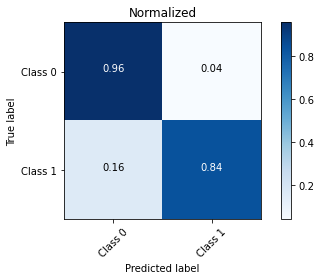

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.869565,0.904762,0.982759,0.838235,"[[23, 1], [11, 57]]",0.898284


In [147]:
TEMP_MODEL = LogisticRegression(class_weight='balanced')

fit_predict([TEMP_MODEL], X_TRAIN_svd[X_TRAIN_svd.columns[(selector1.coef_!=0)[0]]], X_TEST_svd[X_TEST_svd.columns[(selector1.coef_!=0)[0]]], 
            Y_TRAIN_svd, Y_TEST_svd)

In [153]:
#let's use set of features chosen by selector to reduce complexity of the model
X_TRAIN_svd, X_TEST_svd = X_TRAIN_svd[X_TRAIN_svd.columns[(selector1.coef_!=0)[0]]], X_TEST_svd[X_TEST_svd.columns[(selector1.coef_!=0)[0]]]

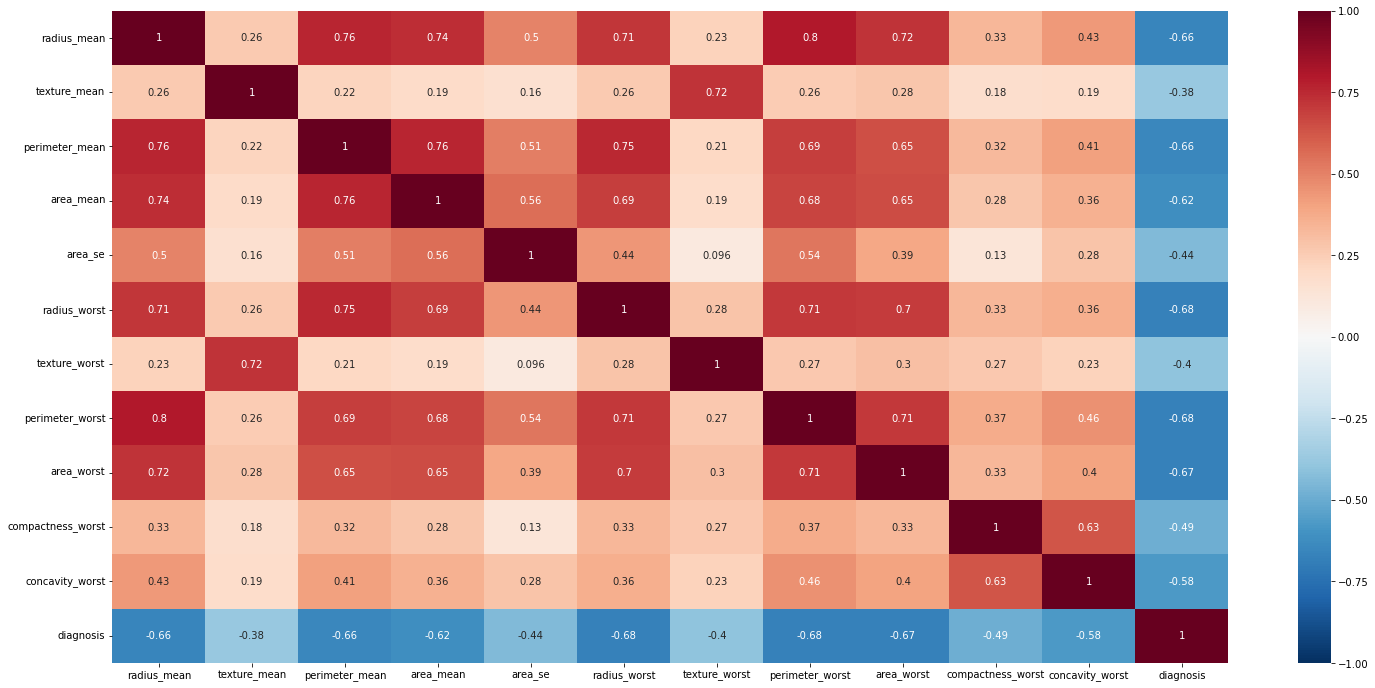

In [155]:
# Need to think about feature derivatives
TRAIN = pd.concat([X_TRAIN_svd,Y_TRAIN_svd], axis=1)

plt.figure(figsize=(25,12))
sns.heatmap(TRAIN.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

# Hyperparameters Tuning

In [182]:
def hyper(X_TRAIN_svd,Y_TRAIN_svd):
    
    models = {'LogisticRegression':LogisticRegression(class_weight='balanced')}
    
    
    parameters = {'LogisticRegression':{'GSCV':{'estimator':models['LogisticRegression'],
                                 'param_grid':{'C' : np.linspace(0.1, 2, 50),
                                               'penalty' : ['l1','l2','elasticnet','none'], 
                                               'class_weight' : [None,'balanced'],
                                               'solver':['saga', 'lbfgs', 'liblinear']},
                                 'cv':3, 
                                 'scoring':'roc_auc',
                                 'verbose':10,
                                 'n_jobs':-1},
                         'hyperparameters':{}}}
    
    
    for i in list(parameters.keys()):
        gscv = GridSearchCV(**parameters[i]['GSCV']).fit(X_TRAIN_svd,Y_TRAIN_svd)
        parameters[i]['hyperparameters'] = gscv.best_params_
        print(gscv.best_score_)

        models[i] = models[i].set_params(**parameters[i]['hyperparameters'])
        
    return models[i], parameters[i]['hyperparameters']

hyper(X_TRAIN_svd,Y_TRAIN_svd)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
[CV 3/3; 2/1200] START C=0.1, class_weight=None, penalty=l1, solver=lbfgs.......
[CV 3/3; 2/1200] END C=0.1, class_weight=None, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 6/1200] START C=0.1, class_weight=None, penalty=l2, solver=liblinear...
[CV 3/3; 6/1200] END C=0.1, class_weight=None, penalty=l2, solver=liblinear;, score=0.909 total time=   0.0s
[CV 2/3; 8/1200] START C=0.1, class_weight=None, penalty=elasticnet, solver=lbfgs
[CV 2/3; 8/1200] END C=0.1, class_weight=None, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 16/1200] START C=0.1, class_weight=balanced, penalty=l2, solver=saga...
[CV 3/3; 16/1200] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.869 total time=   0.0s
[CV 2/3; 60/1200] START C=0.17755102040816328, class_weight=None, penalty=none, solver=liblinear
[CV 2/3; 60/1200] END C=0.17755102040816328, class_weight=None, penalty=none, sol

/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.

lass_weight=balanced, penalty=l2, solver=liblinear
[CV 1/3; 66/1200] END C=0.17755102040816328, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.906 total time=   0.0s
[CV 2/3; 66/1200] START C=0.17755102040816328, class_weight=balanced, penalty=l2, solver=liblinear
[CV 2/3; 66/1200] END C=0.17755102040816328, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.912 total time=   0.0s
[CV 3/3; 66/1200] START C=0.17755102040816328, class_weight=balanced, penalty=l2, solver=liblinear
[CV 3/3; 66/1200] END C=0.17755102040816328, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.928 total time=   0.0s
[CV 1/3; 67/1200] START C=0.17755102040816328, class_weight=balanced, penalty=elasticnet, solver=saga
[CV 1/3; 67/1200] END C=0.17755102040816328, class_weight=balanced, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/3; 67/1200] START C=0.17755102040816328, class_weight=balanced, penalty=elasticnet, solver=saga
[CV 2/3; 67/1200] END C=0.

on
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/li

enalty=none, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/3; 131/1200] START C=0.29387755102040813, class_weight=None, penalty=none, solver=lbfgs
[CV 3/3; 131/1200] END C=0.29387755102040813, class_weight=None, penalty=none, solver=lbfgs;, score=0.895 total time=   0.0s
[CV 1/3; 132/1200] START C=0.29387755102040813, class_weight=None, penalty=none, solver=liblinear
[CV 1/3; 132/1200] END C=0.29387755102040813, class_weight=None, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3; 196/1200] START C=0.4102040816326531, class_weight=None, penalty=l2, solver=saga
[CV 2/3; 196/1200] END C=0.4102040816326531, class_weight=None, penalty=l2, solver=saga;, score=0.831 total time=   0.0s
[CV 3/3; 196/1200] START C=0.4102040816326531, class_weight=None, penalty=l2, solver=saga
[CV 3/3; 196/1200] END C=0.4102040816326531, class_weight=None, penalty=l2, solver=saga;, score=0.821 total time=   0.0s
[CV 1/3; 197/1200] START C=0.4102040816326531, class_weight=None, penalty=l

/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/S

near
[CV 3/3; 339/1200] END C=0.6428571428571428, class_weight=None, penalty=l1, solver=liblinear;, score=0.967 total time=   0.0s
[CV 1/3; 340/1200] START C=0.6428571428571428, class_weight=None, penalty=l2, solver=saga
[CV 1/3; 340/1200] END C=0.6428571428571428, class_weight=None, penalty=l2, solver=saga;, score=0.817 total time=   0.0s
[CV 2/3; 340/1200] START C=0.6428571428571428, class_weight=None, penalty=l2, solver=saga
[CV 2/3; 340/1200] END C=0.6428571428571428, class_weight=None, penalty=l2, solver=saga;, score=0.831 total time=   0.0s
[CV 3/3; 340/1200] START C=0.6428571428571428, class_weight=None, penalty=l2, solver=saga
[CV 3/3; 340/1200] END C=0.6428571428571428, class_weight=None, penalty=l2, solver=saga;, score=0.822 total time=   0.0s
[CV 1/3; 341/1200] START C=0.6428571428571428, class_weight=None, penalty=l2, solver=lbfgs
[CV 1/3; 341/1200] END C=0.6428571428571428, class_weight=None, penalty=l2, solver=lbfgs;, score=0.868 total time=   0.0s
[CV 2/3; 341/1200] STAR

/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_w


[CV 2/3; 468/1200] START C=0.836734693877551, class_weight=None, penalty=none, solver=liblinear
[CV 2/3; 468/1200] END C=0.836734693877551, class_weight=None, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3; 468/1200] START C=0.836734693877551, class_weight=None, penalty=none, solver=liblinear
[CV 3/3; 468/1200] END C=0.836734693877551, class_weight=None, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3; 469/1200] START C=0.836734693877551, class_weight=balanced, penalty=l1, solver=saga
[CV 1/3; 469/1200] END C=0.836734693877551, class_weight=balanced, penalty=l1, solver=saga;, score=0.855 total time=   0.0s
[CV 2/3; 469/1200] START C=0.836734693877551, class_weight=balanced, penalty=l1, solver=saga
[CV 2/3; 469/1200] END C=0.836734693877551, class_weight=balanced, penalty=l1, solver=saga;, score=0.890 total time=   0.0s
[CV 3/3; 469/1200] START C=0.836734693877551, class_weight=balanced, penalty=l1, solver=saga
[CV 3/3; 469/1200] END C=0.836

 lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ 

1200] START C=1.0693877551020408, class_weight=balanced, penalty=none, solver=liblinear
[CV 3/3; 624/1200] END C=1.0693877551020408, class_weight=balanced, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3; 625/1200] START C=1.1081632653061226, class_weight=None, penalty=l1, solver=saga
[CV 1/3; 625/1200] END C=1.1081632653061226, class_weight=None, penalty=l1, solver=saga;, score=0.817 total time=   0.0s
[CV 2/3; 625/1200] START C=1.1081632653061226, class_weight=None, penalty=l1, solver=saga
[CV 2/3; 625/1200] END C=1.1081632653061226, class_weight=None, penalty=l1, solver=saga;, score=0.832 total time=   0.0s
[CV 3/3; 625/1200] START C=1.1081632653061226, class_weight=None, penalty=l1, solver=saga
[CV 3/3; 625/1200] END C=1.1081632653061226, class_weight=None, penalty=l1, solver=saga;, score=0.822 total time=   0.0s
[CV 1/3; 626/1200] START C=1.1081632653061226, class_weight=None, penalty=l1, solver=lbfgs
[CV 1/3; 626/1200] END C=1.1081632653061226, class_weight=

ernative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib


[CV 2/3; 662/1200] END C=1.146938775510204, class_weight=balanced, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 662/1200] START C=1.146938775510204, class_weight=balanced, penalty=l1, solver=lbfgs
[CV 3/3; 662/1200] END C=1.146938775510204, class_weight=balanced, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3; 663/1200] START C=1.146938775510204, class_weight=balanced, penalty=l1, solver=liblinear
[CV 1/3; 663/1200] END C=1.146938775510204, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.990 total time=   0.0s
[CV 2/3; 663/1200] START C=1.146938775510204, class_weight=balanced, penalty=l1, solver=liblinear
[CV 2/3; 663/1200] END C=1.146938775510204, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.970 total time=   0.0s
[CV 3/3; 663/1200] START C=1.146938775510204, class_weight=balanced, penalty=l1, solver=liblinear
[CV 3/3; 663/1200] END C=1.146938775510204, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.9

g/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

s
[CV 3/3; 779/1200] START C=1.3408163265306123, class_weight=None, penalty=none, solver=lbfgs
[CV 3/3; 779/1200] END C=1.3408163265306123, class_weight=None, penalty=none, solver=lbfgs;, score=0.895 total time=   0.0s
[CV 1/3; 780/1200] START C=1.3408163265306123, class_weight=None, penalty=none, solver=liblinear
[CV 1/3; 780/1200] END C=1.3408163265306123, class_weight=None, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3; 780/1200] START C=1.3408163265306123, class_weight=None, penalty=none, solver=liblinear
[CV 2/3; 780/1200] END C=1.3408163265306123, class_weight=None, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3; 780/1200] START C=1.3408163265306123, class_weight=None, penalty=none, solver=liblinear
[CV 3/3; 780/1200] END C=1.3408163265306123, class_weight=None, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3; 781/1200] START C=1.3408163265306123, class_weight=balanced, penalty=l1, solver=saga
[CV 1/3; 781/1200]

t/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/Saiz

(LogisticRegression(C=2.0, class_weight='balanced', penalty='l1',
                    solver='liblinear'),
 {'C': 2.0,
  'class_weight': 'balanced',
  'penalty': 'l1',
  'solver': 'liblinear'})

LogisticRegression Confusion Matrix


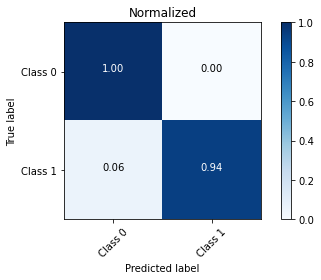

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.956522,0.969697,1.0,0.941176,"[[24, 0], [4, 64]]",0.970588


In [187]:
TEMP_MODEL = LogisticRegression(C=2, solver='liblinear', penalty='l1', class_weight='balanced')

fit_predict([TEMP_MODEL], X_TRAIN_svd, X_TEST_svd, Y_TRAIN_svd, Y_TEST_svd)

# Experiments

LogisticRegression Confusion Matrix


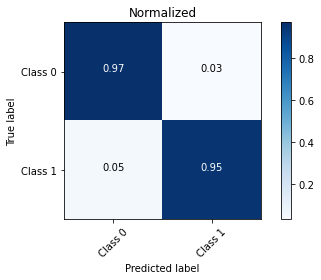

SVC Confusion Matrix


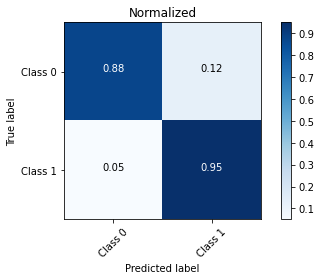

SVC Confusion Matrix


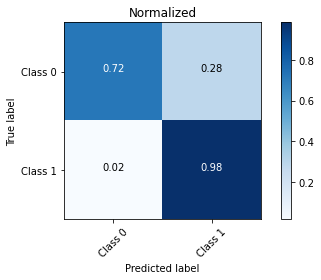

KNeighborsClassifier Confusion Matrix


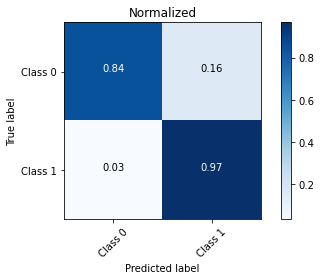

GaussianProcessClassifier Confusion Matrix


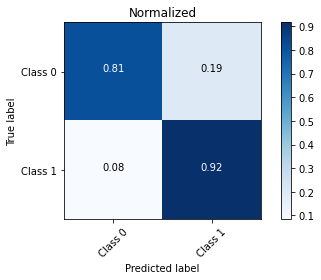

DecisionTreeClassifier Confusion Matrix


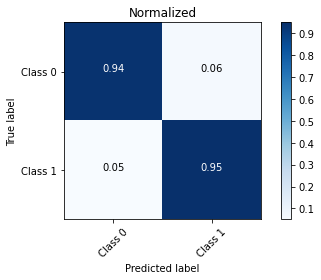

RandomForestClassifier Confusion Matrix


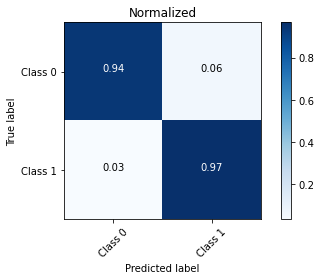

AdaBoostClassifier Confusion Matrix


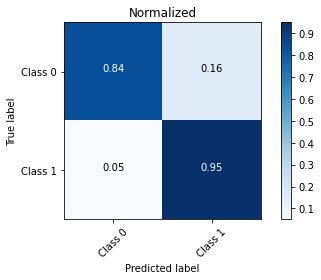

GaussianNB Confusion Matrix


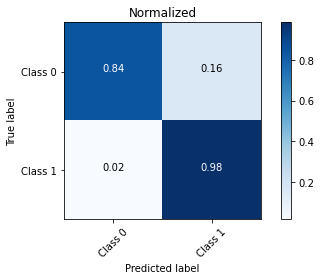

QuadraticDiscriminantAnalysis Confusion Matrix


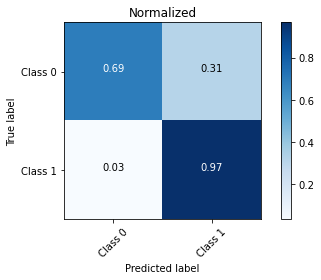

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.956522,0.966102,0.982759,0.950000,"[[31, 1], [3, 57]]",0.959375
SVC,0.923913,0.942149,0.934426,0.950000,"[[28, 4], [3, 57]]",0.912500
SVC,0.891304,0.921875,0.867647,0.983333,"[[23, 9], [1, 59]]",0.851042
KNeighborsClassifier,0.923913,0.943089,0.920635,0.966667,"[[27, 5], [2, 58]]",0.905208
GaussianProcessClassifier,0.880435,0.909091,0.901639,0.916667,"[[26, 6], [5, 55]]",0.864583
DecisionTreeClassifier,0.945652,0.957983,0.966102,0.950000,"[[30, 2], [3, 57]]",0.943750
RandomForestClassifier,0.956522,0.966667,0.966667,0.966667,"[[30, 2], [2, 58]]",0.952083
AdaBoostClassifier,0.913043,0.934426,0.919355,0.950000,"[[27, 5], [3, 57]]",0.896875
GaussianNB,0.934783,0.951613,0.921875,0.983333,"[[27, 5], [1, 59]]",0.913542


In [188]:
# Compare results of your ideas with baseline model accuracy
# Tune hyperparameters
# Stat tests everywhere

MODELS = [LogisticRegression(C=2, solver='liblinear', penalty='l1', class_weight='balanced'),
           SVC(kernel='linear', C=0.025), 
           SVC(), 
           KNeighborsClassifier(), 
           GaussianProcessClassifier(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           AdaBoostClassifier(),
           GaussianNB(),
           QuadraticDiscriminantAnalysis()]

fit_predict(MODELS, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

In [190]:
for model in MODELS:
    print(model.__class__.__name__)
    display(pd.DataFrame(cross_validate(model, X_RECONSTRUCTED, Y, cv=5, 
                                        scoring=['accuracy','f1', 'precision', 'recall', 'roc_auc'])))

LogisticRegression


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.023079,0.003983,0.934783,0.953125,0.938462,0.968254,0.987411
1,0.011478,0.003724,0.956044,0.967742,0.983607,0.952381,0.993764
2,0.016119,0.004145,0.956044,0.967742,0.967742,0.967742,0.981090
3,0.014673,0.003388,0.956044,0.967213,0.983333,0.951613,0.989989
4,0.015780,0.003233,0.967033,0.975610,0.983607,0.967742,0.990545


SVC


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.078601,0.003948,0.945652,0.961240,0.939394,0.984127,0.972085
1,0.018739,0.003542,0.923077,0.945736,0.924242,0.968254,0.977891
2,0.029640,0.003938,0.967033,0.976000,0.968254,0.983871,0.970523
3,0.034059,0.003460,0.934066,0.952381,0.937500,0.967742,0.968854
4,0.032276,0.003454,0.956044,0.968254,0.953125,0.983871,0.991101


SVC


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.004053,0.005216,0.869565,0.911765,0.849315,0.984127,0.963328
1,0.003888,0.004996,0.879121,0.919708,0.851351,1.000000,0.925737
2,0.004094,0.005139,0.912088,0.939394,0.885714,1.000000,0.959956
3,0.003924,0.004689,0.912088,0.939394,0.885714,1.000000,0.954950
4,0.003727,0.004704,0.912088,0.938462,0.897059,0.983871,0.971079


KNeighborsClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.001283,0.007411,0.923913,0.945736,0.924242,0.968254,0.920088
1,0.001157,0.006791,0.923077,0.947368,0.900000,1.000000,0.918367
2,0.001083,0.007772,0.967033,0.975610,0.983607,0.967742,0.974972
3,0.001299,0.007424,0.934066,0.953125,0.924242,0.983871,0.923804
4,0.001067,0.007528,0.945055,0.960000,0.952381,0.967742,0.923526


GaussianProcessClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.014886,0.008940,0.826087,0.864407,0.927273,0.809524,0.513410
1,0.017490,0.009454,0.923077,0.945736,0.924242,0.968254,0.515873
2,0.017830,0.007856,0.890110,0.916667,0.948276,0.887097,0.540323
3,0.015946,0.010238,0.868132,0.900000,0.931034,0.870968,0.516129
4,0.018928,0.008285,0.835165,0.871795,0.927273,0.822581,0.532258


DecisionTreeClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.004629,0.003373,0.913043,0.937500,0.923077,0.952381,0.889984
1,0.004556,0.003102,0.890110,0.921875,0.907692,0.936508,0.861111
2,0.004793,0.003387,0.956044,0.967742,0.967742,0.967742,0.949388
3,0.004965,0.003383,0.901099,0.925620,0.949153,0.903226,0.899889
4,0.005292,0.003695,0.934066,0.951613,0.951613,0.951613,0.924082


RandomForestClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.106028,0.013888,0.945652,0.960000,0.967742,0.952381,0.960044
1,0.097702,0.012830,0.956044,0.968750,0.953846,0.984127,0.991497
2,0.096616,0.012539,0.945055,0.960000,0.952381,0.967742,0.987486
3,0.097962,0.014728,0.934066,0.951613,0.951613,0.951613,0.982759
4,0.107421,0.014966,0.967033,0.976000,0.968254,0.983871,0.997775


AdaBoostClassifier


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.067345,0.011063,0.956522,0.968254,0.968254,0.968254,0.978654
1,0.066095,0.010972,0.934066,0.953846,0.925373,0.984127,0.992063
2,0.062873,0.010933,0.967033,0.976000,0.968254,0.983871,0.979978
3,0.061968,0.010324,0.934066,0.951613,0.951613,0.951613,0.981090
4,0.060131,0.009910,0.945055,0.959350,0.967213,0.951613,0.989433


GaussianNB


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.001401,0.003931,0.945652,0.961240,0.939394,0.984127,0.969349
1,0.001353,0.003190,0.912088,0.936508,0.936508,0.936508,0.984694
2,0.001082,0.003077,0.956044,0.968750,0.939394,1.000000,0.985539
3,0.001059,0.003039,0.945055,0.960000,0.952381,0.967742,0.991657
4,0.001059,0.003082,0.956044,0.968254,0.953125,0.983871,0.992214


QuadraticDiscriminantAnalysis


,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
0,0.003348,0.005857,0.934783,0.953846,0.925373,0.984127,0.957854
1,0.001765,0.003743,0.890110,0.923077,0.895522,0.952381,0.932540
2,0.002343,0.006132,0.945055,0.961240,0.925373,1.000000,0.982202
3,0.007891,0.006883,0.956044,0.968254,0.953125,0.983871,0.948276
4,0.002485,0.004055,0.890110,0.919355,0.919355,0.919355,0.955506


# Validation

In [191]:
# Winner is tunned LogisticRegression

MODELS[0]

LogisticRegression(C=2, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [196]:
VALIDATION[0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,...,28.40,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
109,864018,B,11.340,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,...,13.01,29.15,83.99,518.1,0.16990,0.2196,0.3120,0.08278,0.2829,0.08832
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,...,11.05,21.47,71.68,367.0,0.14670,0.1765,0.1300,0.05334,0.2533,0.08468
111,86408,B,12.630,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,...,13.33,25.47,89.00,527.4,0.12870,0.2250,0.2216,0.11050,0.2226,0.08486


In [197]:
VALIDATION[1]

0      M
1      M
2      M
3      M
4      M
      ..
108    M
109    B
110    B
111    B
112    B
Name: diagnosis, Length: 113, dtype: object

In [198]:
try: 
    VALIDATION[1].replace(['M','B'], [0,1], inplace=True) 
except: 
    pass

In [199]:
VALIDATION[1]

0      0
1      0
2      0
3      0
4      0
      ..
108    0
109    1
110    1
111    1
112    1
Name: diagnosis, Length: 113, dtype: int64

In [203]:
selected_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                 'compactness_worst', 'concavity_worst']

In [210]:
def validate(MODEL, X_TEST, Y_TEST):
    RESULT = []

    for k,classificator in enumerate(MODEL):
        RESULT.append({'Classificator' : classificator.__class__.__name__,
                      'Accuracy' : accuracy_score(Y_TEST, classificator.predict(X_TEST)),
                      'F1' : f1_score(Y_TEST, classificator.predict(X_TEST)),
                      'Precision' : precision_score(Y_TEST, classificator.predict(X_TEST)),
                      'Recall' : recall_score(Y_TEST, classificator.predict(X_TEST)),
                      'Confusion Matrix' : confusion_matrix(Y_TEST, classificator.predict(X_TEST)),
                      'ROC AUC' : roc_auc_score(Y_TEST, classificator.predict(X_TEST))})

        print(RESULT[k]['Classificator']+' Confusion Matrix')
        plot_confusion_matrix(RESULT[k]['Confusion Matrix'], classes=['Class 0', 'Class 1'], normalize=True, title='Normalized')
        plt.show()

    RESULT = pd.DataFrame(RESULT).set_index('Classificator')
    return RESULT

LogisticRegression Confusion Matrix


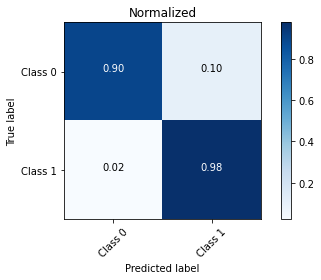

,Accuracy,F1,Precision,Recall,Confusion Matrix,ROC AUC
Classificator,,,,,,
LogisticRegression,0.929204,0.916667,0.862745,0.977778,"[[61, 7], [1, 44]]",0.937418


In [212]:
validate([MODELS[0]], VALIDATION[0].loc[:,selected_cols], VALIDATION[1])

# Conclusion

In [44]:
#Make some conclusions